<a href="https://colab.research.google.com/github/Neel7317/Feature_selection/blob/main/Information_gain_mutual_information_In_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Feature Selection-Information gain - mutual information In Classification Problem Statements**##

**Mutual Information**

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [ ]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df['Wine'].unique()

array([1, 2, 3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
#how to select the best feature from this 12 

In [ ]:
#train test fit to avoid overfitting
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Wine'],axis=1),df['Wine'],test_size=0.3)

In [ ]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
17,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620


In [ ]:
#selecting the feature
from sklearn.feature_selection import mutual_info_classif()

In [ ]:
features=mutual_info_classif(X_train,y_train)

In [ ]:
features

array([0.4796868 , 0.22863561, 0.03277248, 0.21082735, 0.20910399,
       0.34644443, 0.68955146, 0.10295763, 0.18359804, 0.53892096,
       0.49114736, 0.46385353, 0.55813598])

In [ ]:
mutual_info=pd.Series(features)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.689551
Proline                 0.558136
Color.int               0.538921
Hue                     0.491147
Alcohol                 0.479687
OD                      0.463854
Phenols                 0.346444
Malic.acid              0.228636
Acl                     0.210827
Mg                      0.209104
Proanth                 0.183598
Nonflavanoid.phenols    0.102958
Ash                     0.032772
dtype: float64

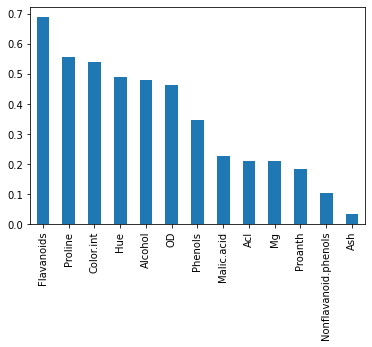

In [ ]:
#plot it
mutual_info.sort_values(ascending=False).plot.bar()

In [ ]:
#Now select top 6 feature
from sklearn.feature_selection import SelectKBest

In [ ]:
feature_select=SelectKBest(mutual_info_classif,k=6)
feature_select.fit(X_train,y_train)
X_train.columns[feature_select.get_support()]

Index(['Alcohol', 'Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

**Difference Between Information Gain And Mutual Information**

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

##Comparion of Univariate And Mutual Information

Comparison of F-test and mutual information https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py